In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.api import qqplot

In [3]:
dta= pd.read_excel("DATAset after Filtering.xlsx")
dta.head(10)

,Daily / Cumulative,Indicator,Date,Event,City,Region,Cases (person)
0,Daily,Cases,2020-03-09,flights suspended to number of countries,Ar Riyad,Ar Riyad,1
1,Daily,Cases,2020-03-13,NaN,Ar Riyad,Ar Riyad,3
2,Daily,Cases,2020-03-14,NaN,Ar Riyad,Ar Riyad,12
3,Daily,Cases,2020-03-15,International flights suspension for 14 days,Ar Riyad,Ar Riyad,2
4,Daily,Cases,2020-03-16,Gov / private suspension,Ar Riyad,Ar Riyad,4
5,Daily,Cases,2020-03-17,NaN,Ar Riyad,Ar Riyad,19
6,Daily,Cases,2020-03-18,NaN,Ar Riyad,Ar Riyad,19
7,Daily,Cases,2020-03-19,NaN,Ar Riyad,Ar Riyad,21
8,Daily,Cases,2020-03-20,NaN,Ar Riyad,Ar Riyad,49
9,Daily,Cases,2020-03-21,Domestic flights suspension,Ar Riyad,Ar Riyad,36


In [4]:
dta.shape

(355, 7)

In [5]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Daily / Cumulative  355 non-null    object        
 1   Indicator           355 non-null    object        
 2   Date                355 non-null    datetime64[ns]
 3   Event               12 non-null     object        
 4   City                355 non-null    object        
 5   Region              355 non-null    object        
 6   Cases (person)      355 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 19.5+ KB


In [6]:
cols = ['Daily / Cumulative', 'Indicator', 'Event', 'City','Region']
dta.drop(cols, axis = 1, inplace = True)
dta.head()

,Date,Cases (person)
0,2020-03-09,1
1,2020-03-13,3
2,2020-03-14,12
3,2020-03-15,2
4,2020-03-16,4


In [7]:
dta = dta.sort_values('Date')
dta.isnull().sum()

Date              0
Cases (person)    0
dtype: int64

In [8]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 0 to 354
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            355 non-null    datetime64[ns]
 1   Cases (person)  355 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.3 KB


In [36]:
cases_by_date = dta.groupby('Date')['Cases (person)'].sum()
print(cases_by_date)
print(dta['Date'].min())
print(dta['Date'].max())

Date
2020-03-09      1
2020-03-13      3
2020-03-14     12
2020-03-15      2
2020-03-16      4
             ... 
2021-02-25    119
2021-02-26    130
2021-02-27    134
2021-02-28    110
2021-03-01    119
Name: Cases (person), Length: 355, dtype: int64
2020-03-09 00:00:00
2021-03-01 00:00:00


In [10]:
dta_df = dta.set_index('Date')
dta_df.index

DatetimeIndex(['2020-03-09', '2020-03-13', '2020-03-14', '2020-03-15',
               '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-21',
               ...
               '2021-02-20', '2021-02-21', '2021-02-22', '2021-02-23',
               '2021-02-24', '2021-02-25', '2021-02-26', '2021-02-27',
               '2021-02-28', '2021-03-01'],
              dtype='datetime64[ns]', name='Date', length=355, freq=None)

In [11]:
dta_df.head(10)

,Cases (person)
Date,
2020-03-09,1
2020-03-13,3
2020-03-14,12
2020-03-15,2
2020-03-16,4
2020-03-17,19
2020-03-18,19
2020-03-19,21
2020-03-20,49


In [12]:
y = dta_df['Cases (person)'].resample('MS').mean()
y['2020':]

Date
2020-03-01     28.650000
2020-04-01    131.600000
2020-05-01    522.129032
2020-06-01    864.866667
2020-07-01    216.258065
2020-08-01     67.903226
2020-09-01     36.133333
2020-10-01     33.193548
2020-11-01     54.666667
2020-12-01     34.032258
2021-01-01     46.419355
2021-02-01    105.214286
2021-03-01    119.000000
Freq: MS, Name: Cases (person), dtype: float64

In [13]:
import matplotlib
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

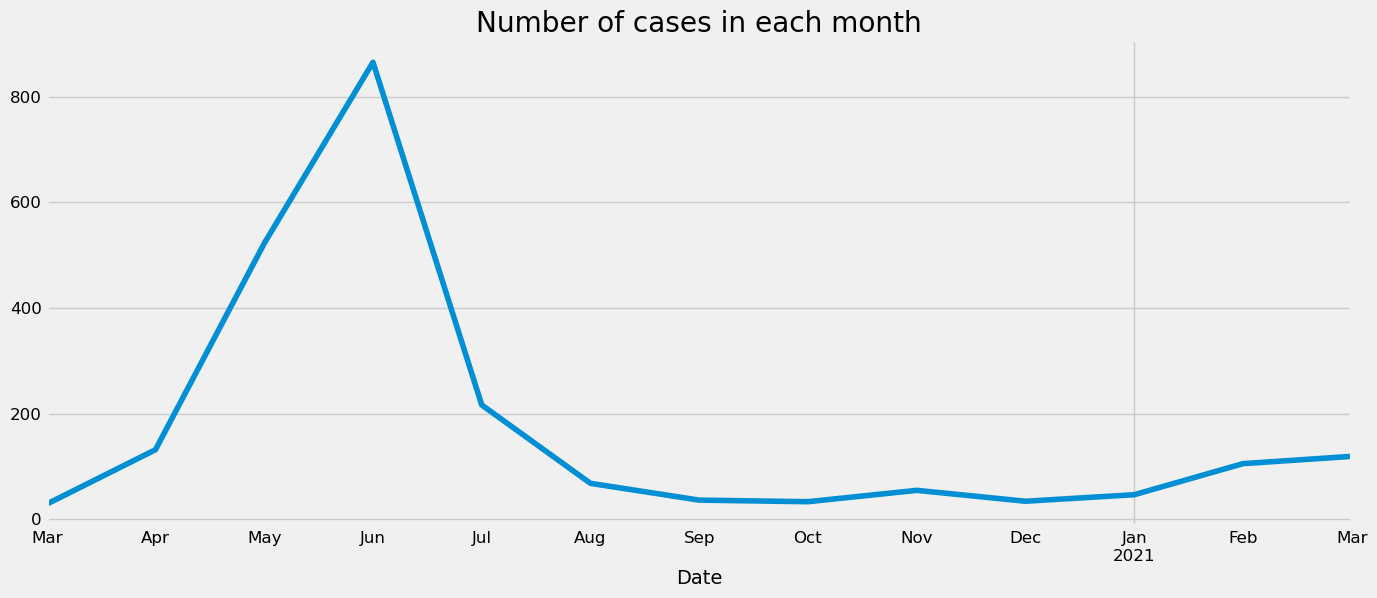

In [14]:
y.plot(figsize = (15, 6))
plt.title("Number of cases in each month")
plt.show()

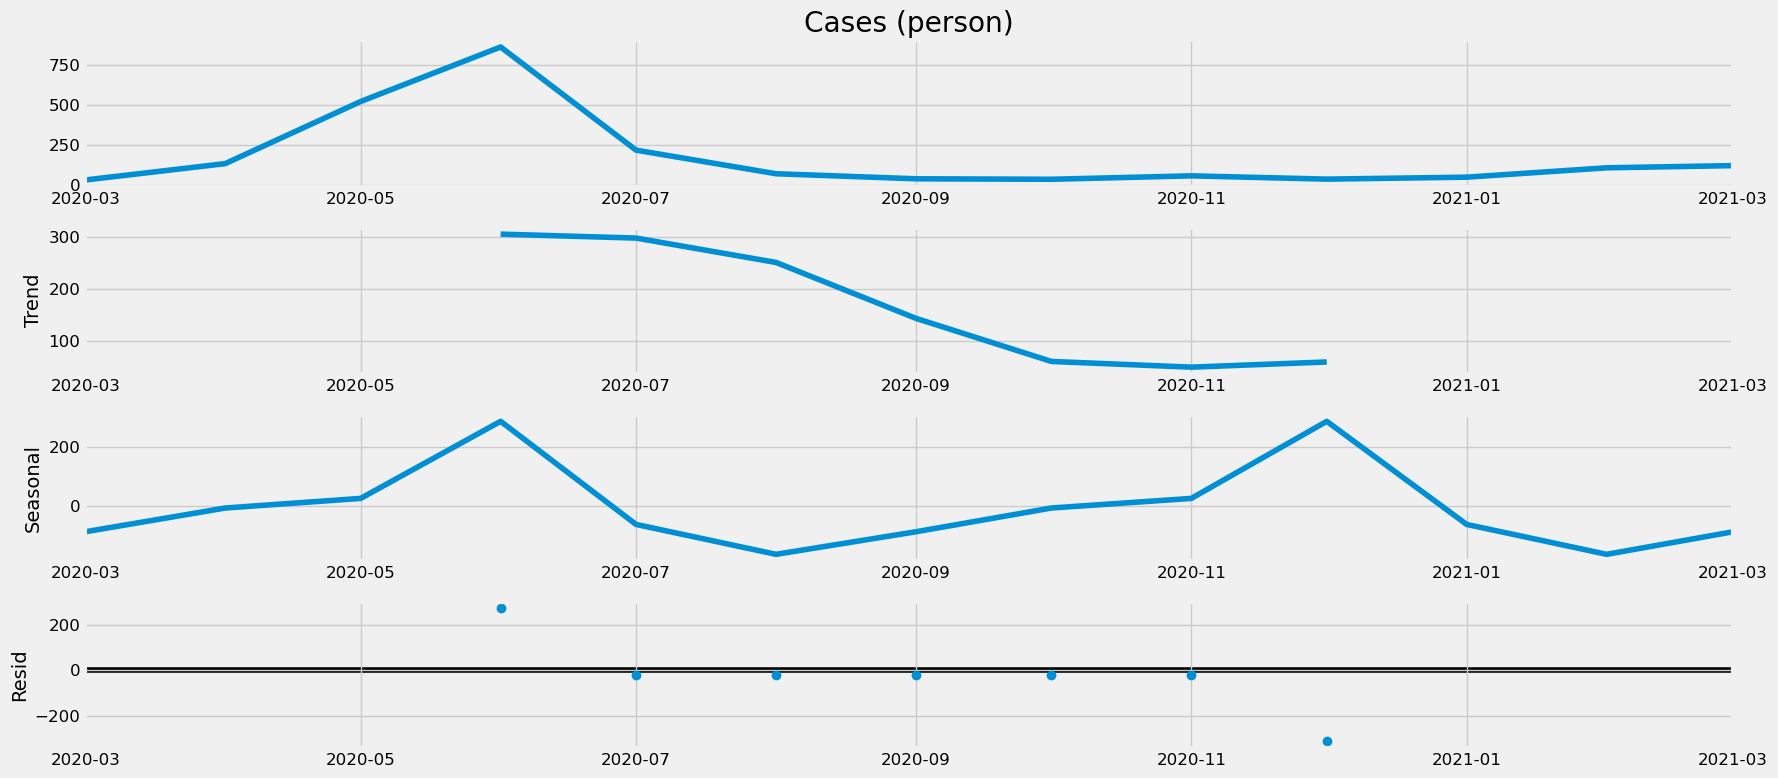

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive',period = int(len(y)/2))
fig = decomposition.plot()
plt.show()

In [16]:
sm.stats.durbin_watson(dta_df)

array([0.08305954])

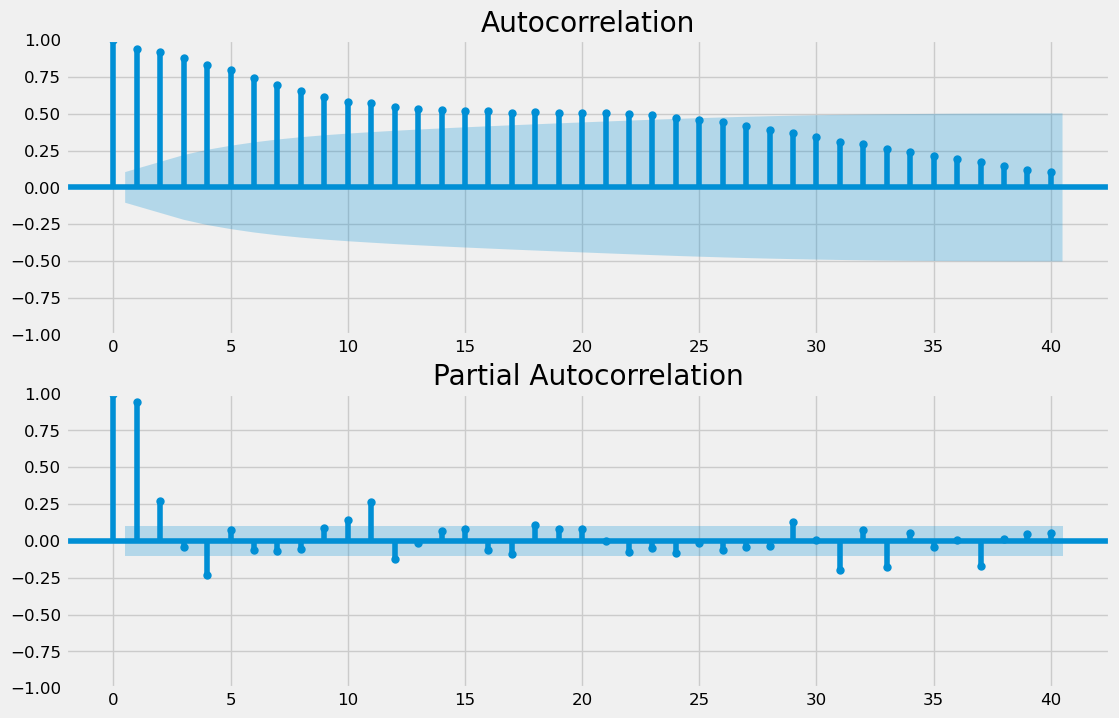

In [17]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta_df.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta_df, lags=40, ax=ax2)

In [18]:
training_data=dta_df[0:355]
test_data=dta_df[355:]

In [19]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [20]:
arima= ARIMA(training_data,order=(2,1,3))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [21]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(training_data, order=(2, 1, 3))

In [22]:
import itertools

p = d = q = range(0, 2)


pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [23]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:186.67013425755
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:188.38763408005892
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:13.845259910743202
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:187.14717555556638
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:189.14717555762488
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:181.44066583306787
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:183.1902940716721
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:182.74419321926655
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:184.74419323035062
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:168.22860016588118
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:170.2138484568652
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:170.17118384083133
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:172.22459026224223
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:170.07823017042966
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:172.05912004159342
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:4.0
A

In [24]:
model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12),
                                  enforce_stationarity = False,
                                  enforce_invertibility=False
                                 )
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
ar.S.L12            0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.000       1.000       1.000


In [25]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                      Cases (person)   No. Observations:                   13
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                   0.000
Date:                             Tue, 04 Jul 2023   AIC                              8.000
Time:                                     16:10:22   BIC                                nan
Sample:                                 03-01-2020   HQIC                               nan
                                      - 03-01-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
ar.S.L12            0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.000       1.000       1.000
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [26]:
series = dta_df['Cases (person)']
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

TypeError: fit() got an unexpected keyword argument 'disp'

In [27]:
series = dta_df['Cases (person)']
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(method='css-mle')
print(model_fit.summary())

ValueError: "css-mle" is not a valid estimator.

In [28]:
series = dta_df['Cases (person)']
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         Cases (person)   No. Observations:                  355
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2119.154
Date:                Tue, 04 Jul 2023   AIC                           4250.308
Time:                        16:31:42   BIC                           4273.524
Sample:                             0   HQIC                          4259.545
                                - 355                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2538      0.020    -12.786      0.000      -0.293      -0.215
ar.L2          0.0784      0.020      3.934      0.000       0.039       0.117
ar.L3          0.1676      0.020      8.401      0.0

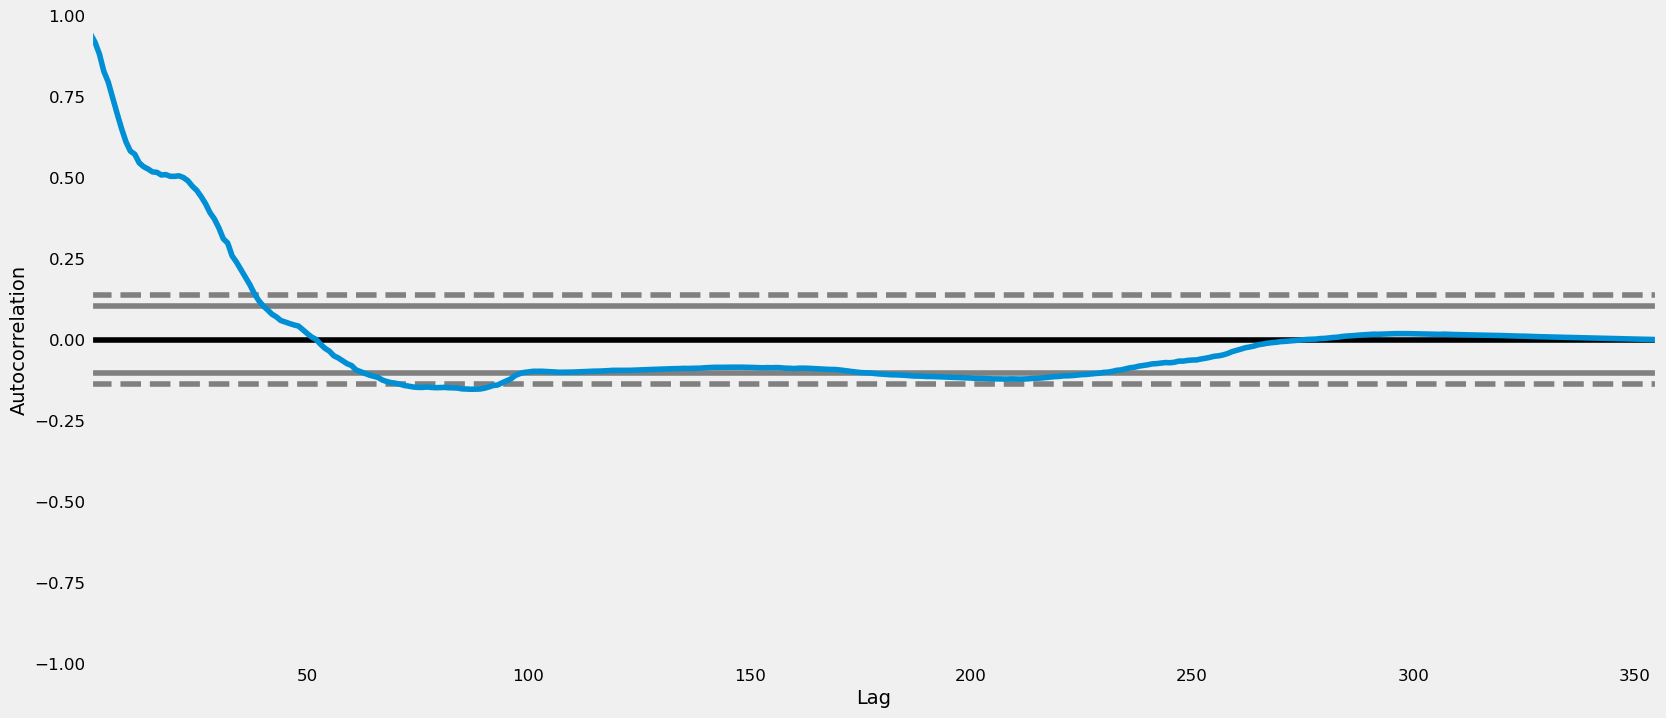

<Figure size 800x560 with 0 Axes>

In [29]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

In [30]:
pred = result.predict('2021','2023',dynamic=True)
pred

2021-01-01     34.032258
2021-02-01     34.032258
2021-03-01     53.132258
2021-04-01    156.082258
2021-05-01    546.611290
2021-06-01    889.348925
2021-07-01    240.740323
2021-08-01     92.385484
2021-09-01     60.615591
2021-10-01     57.675806
2021-11-01     79.148925
2021-12-01     58.514516
2022-01-01     58.514516
2022-02-01     58.514516
2022-03-01     77.614516
2022-04-01    180.564516
2022-05-01    571.093548
2022-06-01    913.831183
2022-07-01    265.222581
2022-08-01    116.867742
2022-09-01     85.097849
2022-10-01     82.158065
2022-11-01    103.631183
2022-12-01     82.996774
2023-01-01     82.996774
Freq: MS, Name: predicted_mean, dtype: float64

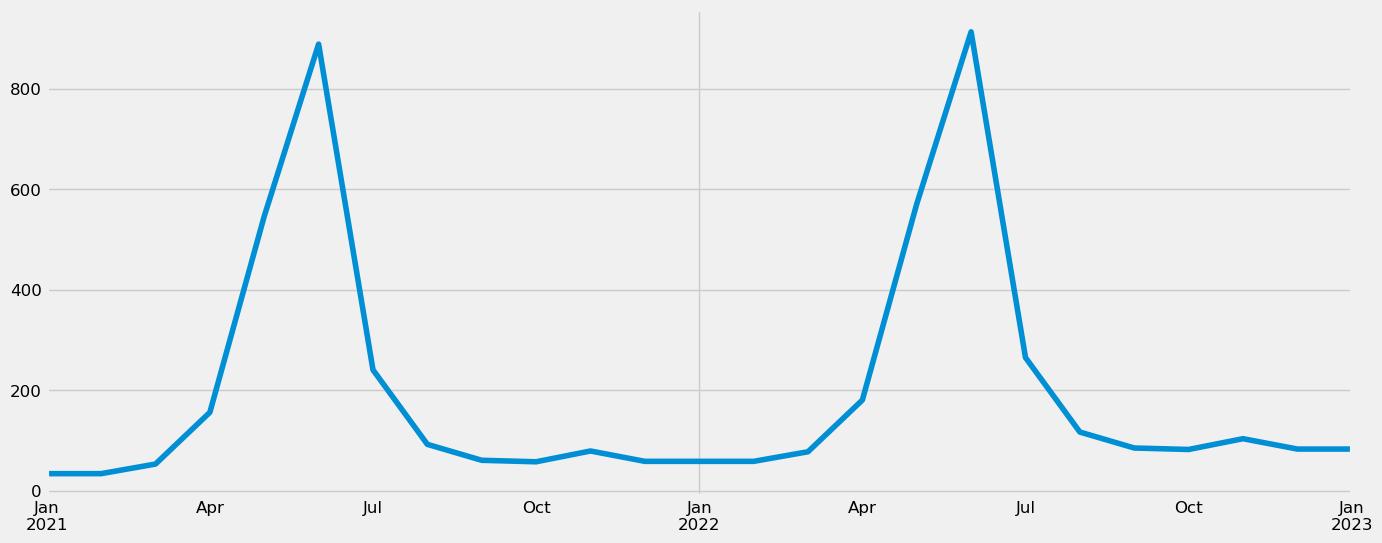

In [31]:
pred.plot(figsize = (15, 6))
plt.show()

In [32]:
prediction = result.get_prediction(start = pd.to_datetime('2021-01-01'),end=pd.to_datetime('2023-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Cases (person),upper Cases (person)
2021-01-01,-2737.776084,2805.840600
2021-02-01,-2725.388987,2818.227696
2021-03-01,-2405.989097,2654.617669
2021-04-01,219.990036,223.909964
2021-05-01,609.707225,615.250840
2021-06-01,951.821909,958.611424
2021-07-01,302.688137,310.527992
2021-08-01,153.870613,162.635839
2021-09-01,121.682422,131.284245
2021-10-01,118.357971,128.729126


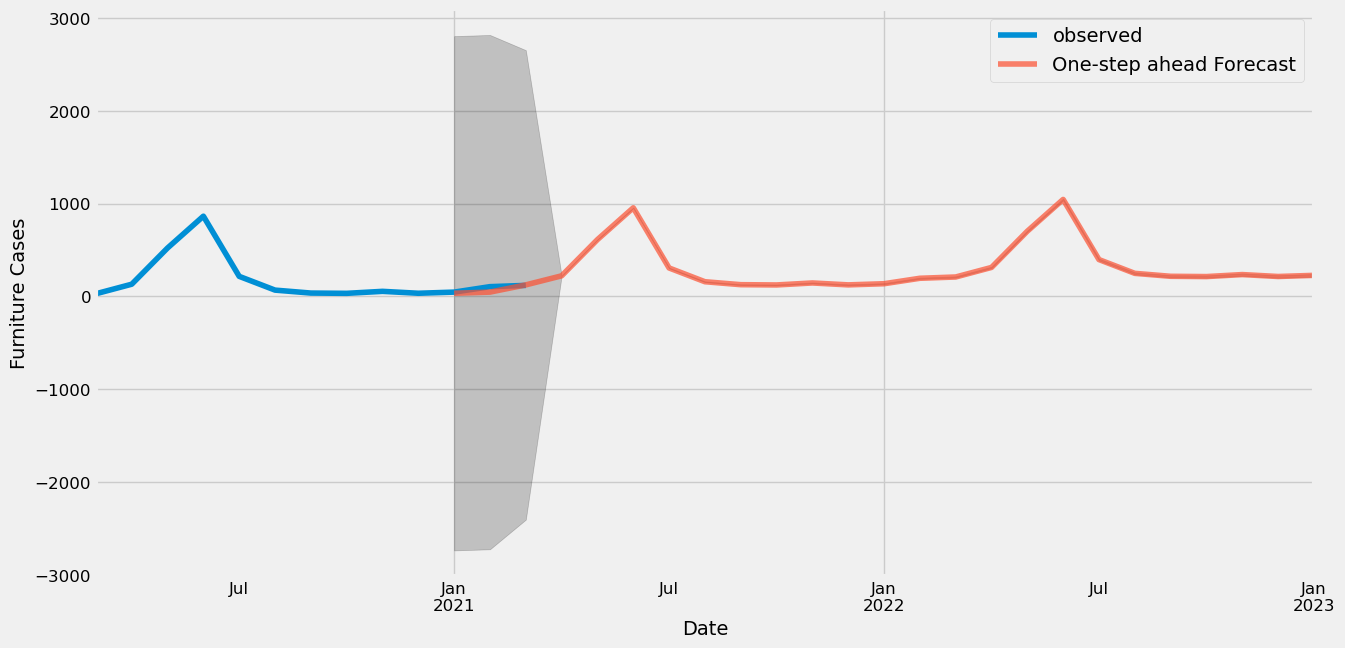

In [33]:
ax = y['2020':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Furniture Cases')
plt.legend()
plt.show()

In [34]:
y_hat = prediction.predicted_mean
y_truth = y['2020-03-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 1212.84
The Root Mean Squared Error of our forecasts is 34.83
